In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Path to your dataset directory
current_path = os.getcwd()

data_dir = os.path.join(current_path,'fer2013')


# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load the dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Create a DataLoader for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Print class-to-index mapping
print("Class-to-Index Mapping:", train_dataset.class_to_idx)

# Example: Iterate through the DataLoader
for images, labels in train_loader:
    print("Batch of images shape:", images.shape)  # Shape: [batch_size, channels, height, width]
    print("Batch of labels:", labels)  # Labels corresponding to the classes
    break



Class-to-Index Mapping: {'test': 0, 'train': 1}
Batch of images shape: torch.Size([32, 3, 224, 224])
Batch of labels: tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1])


Text(0.5, 0, 'class_names')

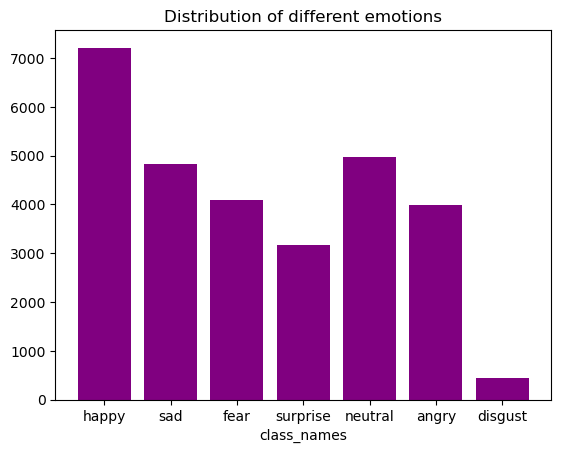

In [10]:
# plot the distribution of images
num_of_images = []
name_of_classes=[]

# Iterate over subfolders (classes)
for a_class in os.listdir(data_dir + '/train'):
    class_path = os.path.join(data_dir, 'train', a_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        num_of_images.append(len(os.listdir(class_path)))
        name_of_classes.append(a_class)
plt.figure()
plt.bar(name_of_classes,num_of_images,color = "purple")
plt.title("Distribution of different emotions")
plt.xlabel("class_names")

['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']